# Simple Linear Regression (Basit Doğrusal Regresyon)
- The main goal is to find the linear function that expresses the relationship between the dependent and independent variable. 
- (Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır)

![](./img/01-ss.png)

<br>
- SSE -> Squares Sum Error (Hata Kareler Toplamı)
<br>  

![](./img/02-ss.png)

<br>  

![](./img/03-ss.png)

<br>  

![](./img/04-ss.png)

In [1]:
import pandas as pd
# ad = pd.read_csv("./data/Advertising.csv", usecols=[1,2,3,4])
ad = pd.read_csv("./data/Advertising.csv")
ad = ad.iloc[:,1:]
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [4]:
# df.isnull().sum()
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
df.isna().values.any()

False

In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [7]:
import seaborn as sns

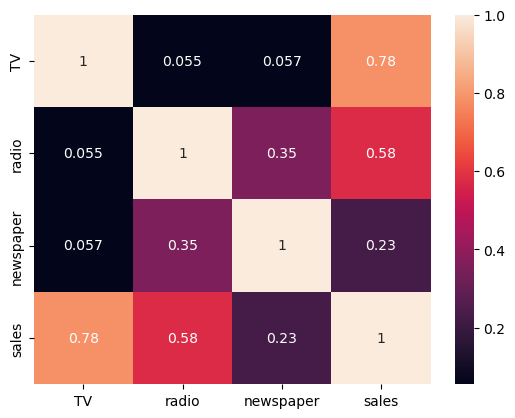

In [8]:
sns.heatmap(df.corr(), annot=True);

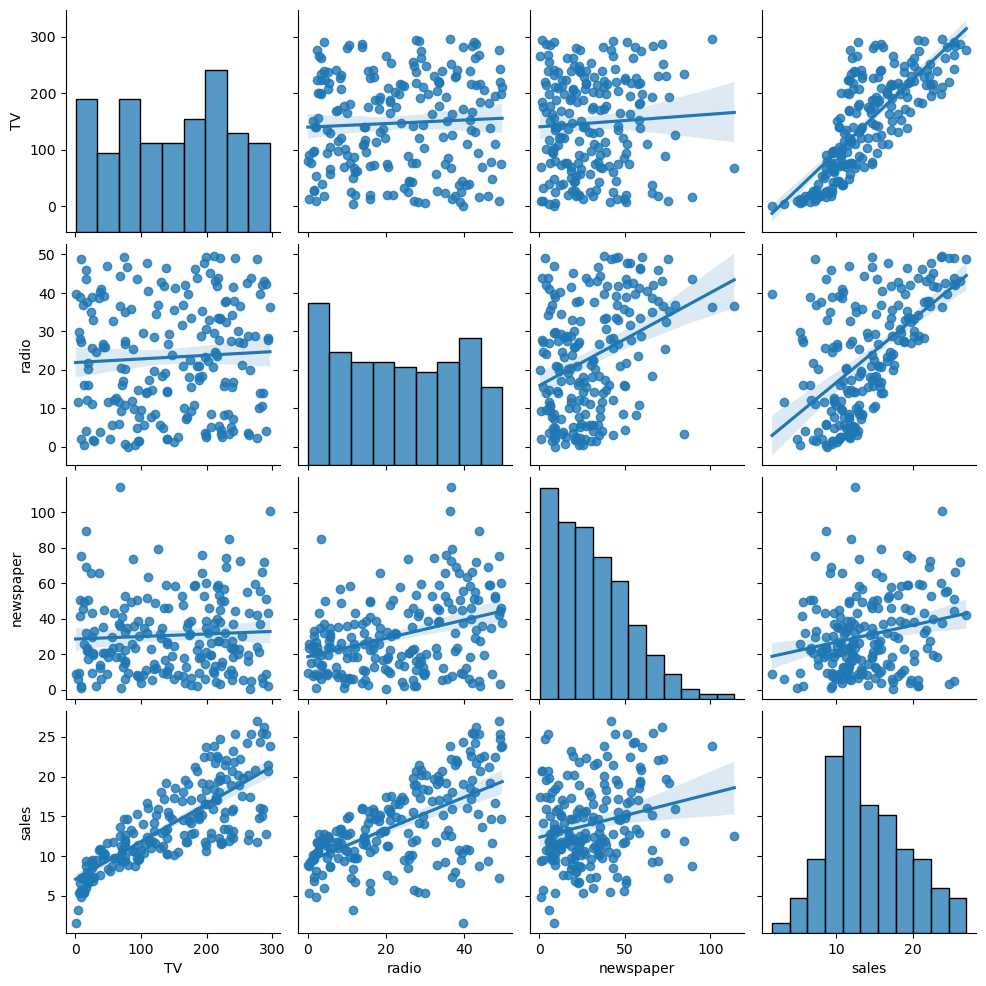

In [9]:
sns.pairplot(df,kind="reg");

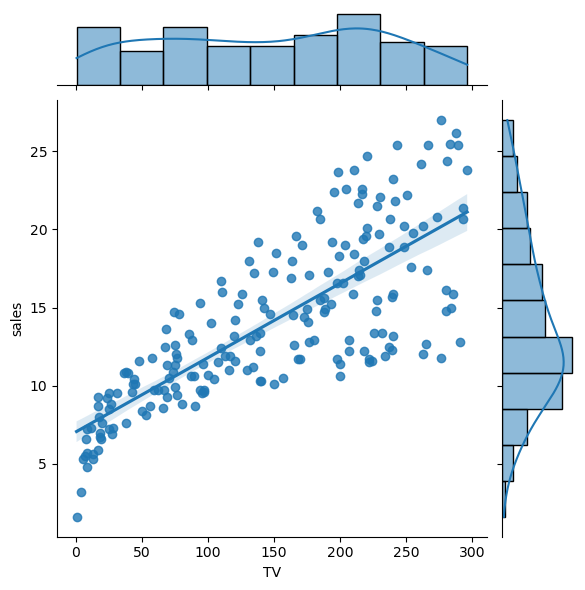

In [10]:
sns.jointplot(x = "TV", y="sales", data=df, kind="reg");

In [11]:
X = df["TV"]
X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [12]:
X = df[["TV"]]
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


### Modeling with Statsmodels (Statsmodels ile modelleme)

In [13]:
import statsmodels.api as sm

In [14]:
X = sm.add_constant(X)
X.iloc[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [15]:
y = df["sales"]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [16]:
lm = sm.OLS(y,X)  # linear-model

In [17]:
model = lm.fit()

In [18]:
model

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.47e-42
Time:                        20:11:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.params  # model parametreleri

const    7.032594
TV       0.047537
dtype: float64

In [21]:
model.summary().tables[1]  # model katsayı detayları

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [22]:
model.conf_int()  # katsayıların güven aralıkları 

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [23]:
model.f_pvalue # modelin anlamlılığı  

1.467389700194647e-42

In [24]:
print("f_pvalue : ", "%.3f" % model.f_pvalue)

f_pvalue :  0.000


In [25]:
print("fvalue : ", "%.3f" % model.fvalue)

fvalue :  312.145


In [26]:
print("tvalue : ", "%.3f" % model.tvalues[0:1])

tvalue :  15.360


In [27]:
model.mse_model  # hata kareler ortalaması

3314.618166868649

In [28]:
model.rsquared  # r kare

0.611875050850071

In [29]:
model.rsquared_adj # düzeltilmiş r kare

0.6099148238341623

In [30]:
model.fittedvalues[0:5]  # tahmin edilen değerler

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [31]:
y[0:5]  # gerçek değerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [32]:
print("Sales = " + str("%.2f" % model.params[0]) + " + TV" + " * " + str("%.2f" % model.params[1]))

Sales = 7.03 + TV * 0.05


/Users/mustafahincal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


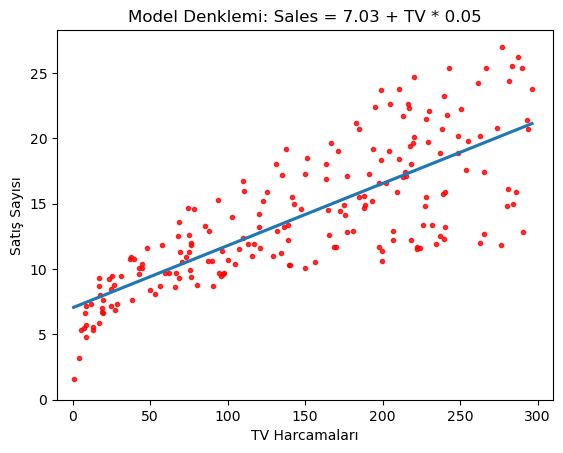

In [33]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV * 0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310);
plt.ylim(bottom=0);

In [34]:
# with sklearn

In [39]:
from sklearn.linear_model import LinearRegression


In [41]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)
print(model.intercept_)
print(model.coef_)

7.0325935491276965
[0.04753664]


In [42]:
model.score(X,y) # r kare

0.611875050850071

In [43]:
model.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

### Prediction (Tahmin)

- Model : 0.04 * TV + 7.03

In [48]:
model.predict([[30]])

/Users/mustafahincal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [61]:
test_data_1 = [5,90,200]
test_data_1 = pd.DataFrame(test_data_1)
test_data_1.columns=["TV"] # if column name is not TV it throws warning
test_data_1

,TV
0,5
1,90
2,200


In [62]:
model.predict(test_data_1)

array([ 7.27027675, 11.31089119, 16.53992164])

In [63]:
test_data_2 = [[5],[90],[200]]
test_data_2

[[5], [90], [200]]

In [64]:
model.predict(test_data_2)

/Users/mustafahincal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675, 11.31089119, 16.53992164])